Lab | Clustering songs
Introduction
Now it's time to cluster the songs of the hot_songs and not_hot_songs databases according to the song's audio features. For this purpose, you need to consider the following questions:

Are you going to use all the audio features? I
If not, which ones do you think that makes more sense to be used?
It might make sense to use a dimensionality reduction technique to visualize the songs with only two features?
What is the optimal number of clusters (for methods that need to know this beforehand)?
What is the best distance to use?
What clustering method provides better results?
Does the clustering method need a transformer?
Considerations
Be aware that this process is extremely time-consuming!!! (it might take several hours on your laptop). Therefore, when testing different options, save the models into your disk in order to be able to use the best model later. You don't want to retrain the best model again when you know what are the optimal parameters for each.

To determine which clustering method performs best, you need to be practical and think about how many clusters you might want to have alongside with a clustering metric to evaluate how good or bad the songs were clustered. If the number of clusters is small, each cluster will be too big and generic. On the contrary, if the number of clusters is too big then each cluster will be too specific and it will be poorly populated (this also depends on how heterogeneous is your dataset).

On the other hand, when you train your clustering model make sure to concatenate both databases together (ie: hot_songs and not_hot_songs) before. If you don't combine both datasets, the clusters obtained with the hot_songs will be different than the ones obtained with the not_hot_songs database even though they might have the same label because they will contain different songs. However, after this, you will not know to which original dataframe belongs each song. To prevent this problem, before the concatenation you can add a new column named "dataset" with a "flag" to remind yourself in which dataset was included ("Hot", "Not hot") each song.

Finally, add a new column to the full dataset for each clustering method with the cluster membership of each song

#STEPS


#1 add hot and not_hot column with H/N
#2 merge both dataframes
#3 use a dimensionality reduction technique: PCA or UMAP
#4 use a clustering method: KMEANS, [DBSCAN, HDBSCAN]
#(add a new column to the full dataset for each clustering method with the cluster membership of each song)
(#5evaluate the better)


In [7]:
#!conda install -c conda-forge dbcv

In [38]:
#import librairies
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler

from sklearn.datasets import make_classification
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import euclidean
from sklearn.metrics import silhouette_score, calinski_harabasz_score
import matplotlib.pyplot as plt
import seaborn as sns
import colorcet as cc
import time
import pickle


In [39]:
#songs datasets with ids + features
hot_songs = pd.read_csv(r"C:\Users\priya\Documents\IRONHACK\Week_6\Day_2\Afternoon\lab-spotify-api\extended_hot_songs.csv")
not_hot_songs = pd.read_csv(r"C:\Users\priya\Documents\IRONHACK\Week_6\Day_2\Afternoon\lab-spotify-api\extended_not_hot_songs.csv")

In [40]:
#1 add hot and not_hot column with H/N
H = 'hot'
N = 'not_hot'

hot_songs['label'] = H
not_hot_songs['label'] = N

In [41]:
#check
hot_songs

,Unnamed: 0,rank,title,artist,id,label
0,5,6,Snooze,SZA,NaN,hot
1,6,7,Water,Tyla,NaN,hot
2,7,8,Last Night,Morgan Wallen,NaN,hot
3,8,9,Fast Car,Luke Combs,NaN,hot
4,9,10,Agora Hills,Doja Cat,NaN,hot
...,...,...,...,...,...,...
75,95,96,Tourniquet,Zach Bryan,NaN,hot
76,96,97,Y Lloro,Junior H,NaN,hot
77,97,98,Murder On The Dancefloor,Sophie Ellis-Bextor,NaN,hot
78,98,99,Amargura,Karol G,NaN,hot


In [42]:
#check
not_hot_songs

,artist,title,id,label
0,Britney Spears,Oops!...I Did It Again,NaN,not_hot
1,blink-182,All The Small Things,NaN,not_hot
2,Faith Hill,Breathe,NaN,not_hot
3,Bon Jovi,It's My Life,NaN,not_hot
4,*NSYNC,Bye Bye Bye,NaN,not_hot
...,...,...,...,...
1995,Jonas Brothers,Sucker,NaN,not_hot
1996,Taylor Swift,Cruel Summer,NaN,not_hot
1997,Blanco Brown,The Git Up,NaN,not_hot
1998,Sam Smith,Dancing With A Stranger (with Normani),NaN,not_hot


In [43]:
#2 merge both dataframes
merged_df = pd.concat([hot_songs, not_hot_songs], ignore_index=True)

In [44]:
#check
merged_df

,Unnamed: 0,rank,title,artist,id,label
0,5.0,6.0,Snooze,SZA,NaN,hot
1,6.0,7.0,Water,Tyla,NaN,hot
2,7.0,8.0,Last Night,Morgan Wallen,NaN,hot
3,8.0,9.0,Fast Car,Luke Combs,NaN,hot
4,9.0,10.0,Agora Hills,Doja Cat,NaN,hot
...,...,...,...,...,...,...
2075,NaN,NaN,Sucker,Jonas Brothers,NaN,not_hot
2076,NaN,NaN,Cruel Summer,Taylor Swift,NaN,not_hot
2077,NaN,NaN,The Git Up,Blanco Brown,NaN,not_hot
2078,NaN,NaN,Dancing With A Stranger (with Normani),Sam Smith,NaN,not_hot


In [45]:
merged_df.to_csv('full_data.csv', index=False)

In [47]:
merged_df1 = pd.read_csv(r"C:\Users\priya\Documents\IRONHACK\Week_6\Day_3\Afternoon\lab-clustering-songs\full_data1.csv")
merged_df1

,artist,song,id,danceability,energy,key,loudness,mode,speechiness,acousticness,...,valence,tempo,type,id.1,uri,track_href,analysis_url,duration_ms,time_signature,H_or_N
0,Jack Harlow,Lovin On Me,spotify:track:4xhsWYTOGcal8zt0J161CU,0.943,0.558,2,-4.911,1,0.0568,0.00260,...,0.606,104.983,audio_features,4xhsWYTOGcal8zt0J161CU,spotify:track:4xhsWYTOGcal8zt0J161CU,https://api.spotify.com/v1/tracks/4xhsWYTOGcal...,https://api.spotify.com/v1/audio-analysis/4xhs...,138411,4,H
1,Taylor Swift,Cruel Summer,spotify:track:1BxfuPKGuaTgP7aM0Bbdwr,0.552,0.702,9,-5.707,1,0.1570,0.11700,...,0.564,169.994,audio_features,1BxfuPKGuaTgP7aM0Bbdwr,spotify:track:1BxfuPKGuaTgP7aM0Bbdwr,https://api.spotify.com/v1/tracks/1BxfuPKGuaTg...,https://api.spotify.com/v1/audio-analysis/1Bxf...,178427,4,H
2,Tate McRae,Greedy,spotify:track:3rUGC1vUpkDG9CZFHMur1t,0.750,0.733,6,-3.180,0,0.0319,0.25600,...,0.844,111.018,audio_features,3rUGC1vUpkDG9CZFHMur1t,spotify:track:3rUGC1vUpkDG9CZFHMur1t,https://api.spotify.com/v1/tracks/3rUGC1vUpkDG...,https://api.spotify.com/v1/audio-analysis/3rUG...,131872,1,H
3,Doja Cat,Paint The Town Red,spotify:track:2IGMVunIBsBLtEQyoI1Mu7,0.868,0.538,5,-8.603,1,0.1740,0.26900,...,0.732,99.968,audio_features,2IGMVunIBsBLtEQyoI1Mu7,spotify:track:2IGMVunIBsBLtEQyoI1Mu7,https://api.spotify.com/v1/tracks/2IGMVunIBsBL...,https://api.spotify.com/v1/audio-analysis/2IGM...,231750,4,H
4,Zach Bryan Featuring Kacey Musgraves,I Remember Everything,spotify:track:4KULAymBBJcPRpk1yO4dOG,0.429,0.453,0,-7.746,1,0.0459,0.55400,...,0.155,77.639,audio_features,4KULAymBBJcPRpk1yO4dOG,spotify:track:4KULAymBBJcPRpk1yO4dOG,https://api.spotify.com/v1/tracks/4KULAymBBJcP...,https://api.spotify.com/v1/audio-analysis/4KUL...,227196,4,H
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,Jonas Brothers,Sucker,spotify:track:22vgEDb5hykfaTwLuskFGD,0.775,0.598,2,-7.274,1,0.0535,0.00175,...,0.356,129.988,audio_features,0lnIJmgcUpEpe4AZACjayW,spotify:track:0lnIJmgcUpEpe4AZACjayW,https://api.spotify.com/v1/tracks/0lnIJmgcUpEp...,https://api.spotify.com/v1/audio-analysis/0lnI...,232560,4,N
2096,Taylor Swift,Cruel Summer,spotify:track:1BxfuPKGuaTgP7aM0Bbdwr,0.773,0.747,5,-4.061,1,0.0885,0.02420,...,0.801,126.014,audio_features,0ErK6K0kYr0Ow2RkPMhmMs,spotify:track:0ErK6K0kYr0Ow2RkPMhmMs,https://api.spotify.com/v1/tracks/0ErK6K0kYr0O...,https://api.spotify.com/v1/audio-analysis/0ErK...,246240,4,N
2097,Blanco Brown,The Git Up,spotify:track:01tA4XmJ4fGQNwti6b2hPm,0.664,0.573,5,-6.519,1,0.0277,0.61300,...,0.566,76.023,audio_features,3d8y0t70g7hw2FOWl9Z4Fm,spotify:track:3d8y0t70g7hw2FOWl9Z4Fm,https://api.spotify.com/v1/tracks/3d8y0t70g7hw...,https://api.spotify.com/v1/audio-analysis/3d8y...,160097,4,N
2098,Sam Smith,Dancing With A Stranger (with Normani),spotify:track:3xgT3xIlFGqZjYW9QlhJWp,0.275,0.238,9,-13.119,1,0.0389,0.97700,...,0.257,88.980,audio_features,0fF9YHMCuv1mAQv4z5SU7L,spotify:track:0fF9YHMCuv1mAQv4z5SU7L,https://api.spotify.com/v1/tracks/0fF9YHMCuv1m...,https://api.spotify.com/v1/audio-analysis/0fF9...,155167,4,N


In [48]:
#check
merged_df1.columns

Index(['artist', 'song', 'id', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'type', 'id.1', 'uri', 'track_href', 'analysis_url',
       'duration_ms', 'time_signature', 'H_or_N'],
      dtype='object')

In [49]:
columns_to_drop = ['type', 'id.1', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature', 'mode',  'valence']

# Check if columns exist in the DataFrame
columns_to_drop_existing = list(set(columns_to_drop).intersection(merged_df.columns))

# Drop the existing columns
merged_df1 = merged_df1.drop(columns=columns_to_drop_existing)

merged_df1.columns

Index(['artist', 'song', 'id', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'type', 'id.1', 'uri', 'track_href', 'analysis_url',
       'duration_ms', 'time_signature', 'H_or_N'],
      dtype='object')

In [50]:
#3 use a dimensionality reduction technique: PCA
#X needs to  be scaled before
X_features = ['danceability', 'energy', 'key', 'loudness',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'tempo']

In [51]:
X_features = merged_df1[X_features]
X_features

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,tempo
0,0.943,0.558,2,-4.911,0.0568,0.00260,0.000002,0.0937,104.983
1,0.552,0.702,9,-5.707,0.1570,0.11700,0.000021,0.1050,169.994
2,0.750,0.733,6,-3.180,0.0319,0.25600,0.000000,0.1140,111.018
3,0.868,0.538,5,-8.603,0.1740,0.26900,0.000003,0.0901,99.968
4,0.429,0.453,0,-7.746,0.0459,0.55400,0.000002,0.1020,77.639
...,...,...,...,...,...,...,...,...,...
2095,0.775,0.598,2,-7.274,0.0535,0.00175,0.000004,0.2530,129.988
2096,0.773,0.747,5,-4.061,0.0885,0.02420,0.000009,0.1090,126.014
2097,0.664,0.573,5,-6.519,0.0277,0.61300,0.000363,0.0857,76.023
2098,0.275,0.238,9,-13.119,0.0389,0.97700,0.912000,0.1450,88.980


In [52]:
#check
X_features.describe()

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,tempo
count,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000
mean,0.665100,0.707474,5.410000,-5.783525,0.102778,0.146547,0.027393,0.181648,120.097899
std,0.142213,0.166388,3.615381,2.652679,0.096477,0.200268,0.131568,0.142002,27.210620
min,0.000000,0.000050,0.000000,-39.264000,0.000000,0.000010,0.000000,0.021500,0.000000
25%,0.574000,0.608000,2.000000,-6.730250,0.039500,0.014975,0.000000,0.090100,98.993500
50%,0.674000,0.730500,6.000000,-5.368000,0.059350,0.060150,0.000000,0.125000,120.021500
75%,0.763000,0.834000,8.000000,-4.205500,0.126000,0.193000,0.000084,0.237000,135.027750
max,0.975000,0.997000,11.000000,0.836000,0.530000,0.989000,0.985000,0.971000,210.857000


In [53]:
#check
X_features.info

<bound method DataFrame.info of       danceability  energy  key  loudness  speechiness  acousticness  \
0            0.943   0.558    2    -4.911       0.0568       0.00260   
1            0.552   0.702    9    -5.707       0.1570       0.11700   
2            0.750   0.733    6    -3.180       0.0319       0.25600   
3            0.868   0.538    5    -8.603       0.1740       0.26900   
4            0.429   0.453    0    -7.746       0.0459       0.55400   
...            ...     ...  ...       ...          ...           ...   
2095         0.775   0.598    2    -7.274       0.0535       0.00175   
2096         0.773   0.747    5    -4.061       0.0885       0.02420   
2097         0.664   0.573    5    -6.519       0.0277       0.61300   
2098         0.275   0.238    9   -13.119       0.0389       0.97700   
2099         0.794   0.653    7    -7.839       0.1040       0.04890   

      instrumentalness  liveness    tempo  
0             0.000002    0.0937  104.983  
1             0

In [54]:
import pickle

scaler = StandardScaler()
scaler.fit(X_features)
X_scaled = scaler.transform(X_features)
filename = "features_scaler.pickle" # Path with filename

with open(filename, "wb") as file:
        pickle.dump(scaler,file)

X_scaled_df = pd.DataFrame(X_scaled, columns = X_features.columns)
display(X_features.head())
print()
display(X_scaled_df.head()) #all the columns will have mean = 0 and sd = 1

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,tempo
0,0.943,0.558,2,-4.911,0.0568,0.0026,0.000002,0.0937,104.983
1,0.552,0.702,9,-5.707,0.1570,0.1170,0.000021,0.1050,169.994
2,0.750,0.733,6,-3.180,0.0319,0.2560,0.000000,0.1140,111.018
3,0.868,0.538,5,-8.603,0.1740,0.2690,0.000003,0.0901,99.968
4,0.429,0.453,0,-7.746,0.0459,0.5540,0.000002,0.1020,77.639


,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,tempo
0,1.954576,-0.898561,-0.943417,0.329001,-0.476684,-0.718942,-0.208238,-0.619492,-0.555610
1,-0.795475,-0.032907,0.993216,0.028855,0.562148,-0.147571,-0.208098,-0.539897,1.834136
2,0.597134,0.153450,0.163231,0.981704,-0.734837,0.546665,-0.208255,-0.476502,-0.333769
3,1.427072,-1.018791,-0.113431,-1.063131,0.738397,0.611594,-0.208230,-0.644850,-0.739957
4,-1.660581,-1.529768,-1.496741,-0.739985,-0.589691,2.035028,-0.208240,-0.561028,-1.560751


In [55]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_scaled_df)
principal_components = pca.transform(X_scaled_df)
principal_components_df = pd.DataFrame(principal_components, columns=['PCA_'+ str(i) for i in range(1,X_scaled_df.shape[1]+1)]) 
#let's set the option "n_components" to a given integer number
principal_components_df.head()

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9
0,-0.074350,-1.895594,-0.664690,0.676747,1.022623,0.235777,-1.031004,0.326677,-0.579963
1,-0.285888,0.830070,0.902970,-1.706133,0.116136,-1.011508,0.012445,0.326083,-0.133038
2,-0.331692,-0.622462,-0.989349,-0.162083,-0.136723,-0.230015,-0.264017,-0.936058,-0.266621
3,1.450978,-1.877292,0.500704,0.249409,0.203748,-0.055556,-0.200579,0.083571,0.330609
4,2.652758,0.478202,-1.165714,1.851899,-0.296796,-1.364102,0.971367,-0.342504,-0.323604


In [56]:
#if the 2 first PCA_component represent at least 80%, we can use this method
# 0.2514264890029777 +  0.39486977572454984 = 0.6462962647275275 : it is not good
cumulated_explained_variance_ratio = [sum(pca.explained_variance_ratio_[0:i+1]) for i,value in enumerate(pca.explained_variance_ratio_)]
cumulated_explained_variance_ratio

[0.25908195721841726,
 0.3986545152543034,
 0.5197750311269332,
 0.6338629699413055,
 0.7409561301674833,
 0.8409351103702284,
 0.9145527674212305,
 0.9725056799562947,
 1.0000000000000002]

In [58]:
conda install -c conda-forge umap-learn


Note: you may need to restart the kernel to use updated packages.




==> WARNING: A newer version of conda exists. <==
  current version: 23.7.4
  latest version: 23.11.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.11.0




Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\priya\anaconda3

  added / updated specs:
    - umap-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    pynndescent-0.5.11         |     pyhca7485f_0          48 KB  conda-forge
    python_abi-3.11            |          2_cp311           5 KB  conda-forge
    umap-learn-0.5.5           |  py311h1ea47a8_0         186 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         239 KB

The following NEW packages will be INSTALLED:

  pynndescent        conda-forge/noarch::pynndescent-0.5.11-pyhca7485f_0 
  python_abi         conda-forge/win-64::python_abi-3.11-2_cp311 
  umap-learn         conda-forge/win-64::umap-learn-0.5.5-py311h1ea47a8_0 




python_abi-3.11      | 5 KB      |            |   0% 

umap-learn-0.5.

In [59]:
#3 use a dimensionality reduction technique: UMAP
#UMAP, n_components=2

from umap import UMAP

reducer = UMAP(n_components=2,random_state=42) #test with different numbers of n_components
reducer.fit(X_features)

X_umap_transformed = reducer.transform(X_features)
X_umap_transformed_df = pd.DataFrame(X_umap_transformed, columns=["UMAP_1","UMAP_2"])
X_umap_transformed_df.head()

C:\Users\priya\anaconda3\Lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


,UMAP_1,UMAP_2
0,-4.715898,2.757841
1,10.702214,7.594029
2,-2.254171,-0.301227
3,-3.746928,4.808707
4,-3.948433,13.550782


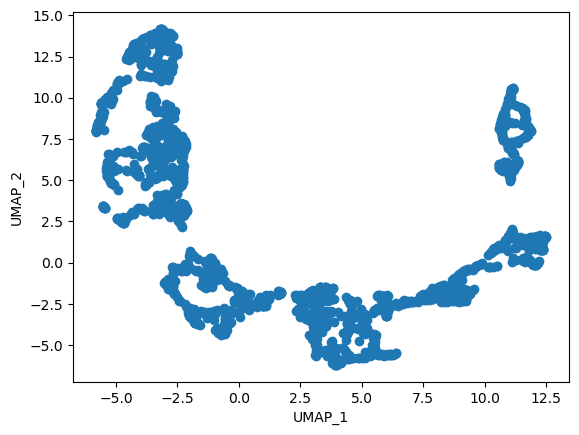

In [60]:
fig, ax = plt.subplots()
ax.scatter(X_umap_transformed_df['UMAP_1'],X_umap_transformed_df['UMAP_2'])
ax.set_xlabel("UMAP_1")
ax.set_ylabel("UMAP_2")
plt.show()

C:\Users\priya\anaconda3\Lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
C:\Users\priya\anaconda3\Lib\site-packages\matplotlib\collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


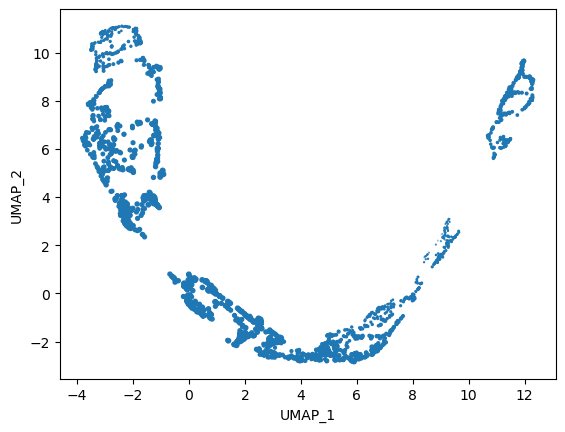

In [61]:
#UMAP, n_components=3
from umap import UMAP

reducer = UMAP(n_components=3,random_state=42) #test with different numbers of n_components
reducer.fit(X_features)

X_umap_transformed = reducer.transform(X_features)
X_umap_transformed_df = pd.DataFrame(X_umap_transformed, columns=["UMAP_1","UMAP_2","UMAP_3"])
X_umap_transformed_df.head()

fig, ax = plt.subplots()
ax.scatter(X_umap_transformed_df['UMAP_1'],X_umap_transformed_df['UMAP_2'],X_umap_transformed_df['UMAP_3'])
ax.set_xlabel("UMAP_1")
ax.set_ylabel("UMAP_2")
plt.show()

C:\Users\priya\anaconda3\Lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


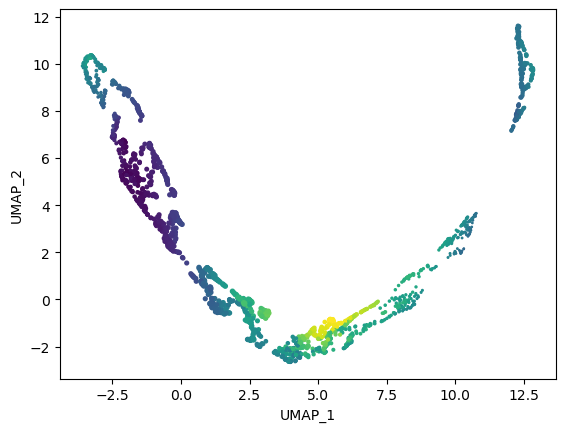

In [62]:
#UMAP, n_components=4
from umap import UMAP

reducer = UMAP(n_components=4,random_state=42) #test with different numbers of n_components
reducer.fit(X_features)

X_umap_transformed = reducer.transform(X_features)
X_umap_transformed_df = pd.DataFrame(X_umap_transformed, columns=["UMAP_1","UMAP_2","UMAP_3","UMAP_4"])
X_umap_transformed_df.head()

fig, ax = plt.subplots()
ax.scatter(X_umap_transformed_df['UMAP_1'],X_umap_transformed_df['UMAP_2'],X_umap_transformed_df['UMAP_3'],X_umap_transformed_df['UMAP_4'])
ax.set_xlabel("UMAP_1")
ax.set_ylabel("UMAP_2")
plt.show()

C:\Users\priya\anaconda3\Lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


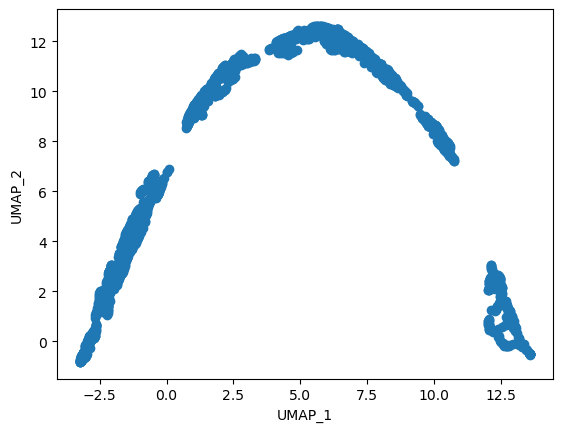

In [63]:
# UMAP, n_components=6
reducer = UMAP(n_components=6, random_state=42)  # Set the desired number of components
reducer.fit(X_features)

X_umap_transformed = reducer.transform(X_features)
X_umap_transformed_df = pd.DataFrame(X_umap_transformed, columns=["UMAP_1", "UMAP_2", "UMAP_3", "UMAP_4", "UMAP_5", "UMAP_6"])

fig, ax = plt.subplots()
ax.scatter(X_umap_transformed_df['UMAP_1'], X_umap_transformed_df['UMAP_2'])
ax.set_xlabel("UMAP_1")
ax.set_ylabel("UMAP_2")
plt.show()

In [64]:
#choosing the k; both methods suggest to use k =
from sklearn.cluster import KMeans

Training a K-Means model with 2 clusters! 



C:\Users\priya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\priya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


Initialization complete
Iteration 0, inertia 21407.774890227163.
Iteration 1, inertia 17322.066194996067.
Iteration 2, inertia 17230.7833791756.
Iteration 3, inertia 17151.335063943898.
Iteration 4, inertia 17075.247109734955.
Iteration 5, inertia 16998.871386614544.
Iteration 6, inertia 16910.98413069251.
Iteration 7, inertia 16812.394597758015.
Iteration 8, inertia 16726.76822792301.
Iteration 9, inertia 16639.052119308548.
Iteration 10, inertia 16555.487813214222.
Iteration 11, inertia 16483.215764516743.
Iteration 12, inertia 16416.600223312464.
Iteration 13, inertia 16360.088811424861.
Iteration 14, inertia 16319.566759549163.
Iteration 15, inertia 16278.881184720582.
Iteration 16, inertia 16250.317354121049.
Iteration 17, inertia 16228.283034075897.
Iteration 18, inertia 16212.504227213147.
Iteration 19, inertia 16196.910511993703.
Iteration 20, inertia 16185.820104631279.
Iteration 21, inertia 16178.379633795057.
Iteration 22, inertia 16171.430082620773.
Iteration 23, inertia 16

Iteration 0, inertia 21924.302805791278.
Iteration 1, inertia 17414.714872864024.
Iteration 2, inertia 17138.58164196369.
Iteration 3, inertia 16752.201393685213.
Iteration 4, inertia 16545.46957899997.
Iteration 5, inertia 16427.9130008903.
Iteration 6, inertia 16358.292163395916.
Iteration 7, inertia 16317.439796818575.
Iteration 8, inertia 16284.109129320233.
Iteration 9, inertia 16251.27793383982.
Iteration 10, inertia 16230.849737087165.
Iteration 11, inertia 16212.83541818998.
Iteration 12, inertia 16196.220213123492.
Iteration 13, inertia 16185.82903712925.
Iteration 14, inertia 16177.814110187497.
Iteration 15, inertia 16170.942393367452.
Iteration 16, inertia 16162.343080253886.
Iteration 17, inertia 16156.158554517438.
Iteration 18, inertia 16152.410686986806.
Iteration 19, inertia 16149.689392798415.
Iteration 20, inertia 16148.75975328661.
Iteration 21, inertia 16148.629517744235.
Converged at iteration 21: center shift 4.146986189193287e-05 within tolerance 9.9999999999999

C:\Users\priya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\priya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


Iteration 9, inertia 14677.457524499725.
Iteration 10, inertia 14643.117909862678.
Iteration 11, inertia 14623.137530628564.
Iteration 12, inertia 14607.771683856143.
Iteration 13, inertia 14604.555076055134.
Iteration 14, inertia 14602.266307089167.
Iteration 15, inertia 14601.114599238357.
Iteration 16, inertia 14599.393131776791.
Iteration 17, inertia 14598.628827148137.
Iteration 18, inertia 14598.218493636483.
Converged at iteration 18: center shift 9.881716472780838e-05 within tolerance 9.99999999999998e-05.
Initialization complete
Iteration 0, inertia 20882.174820585627.
Iteration 1, inertia 14833.978423044937.
Iteration 2, inertia 14690.536599040966.
Iteration 3, inertia 14638.562857466315.
Iteration 4, inertia 14612.508344313943.
Iteration 5, inertia 14604.175195609037.
Iteration 6, inertia 14597.008444840183.
Iteration 7, inertia 14593.418738802437.
Iteration 8, inertia 14588.511453578387.
Iteration 9, inertia 14586.437458808248.
Iteration 10, inertia 14584.487364765559.
Iter

Iteration 12, inertia 14598.181645793944.
Iteration 13, inertia 14597.437039557586.
Iteration 14, inertia 14597.314464093237.
Iteration 15, inertia 14596.938503992253.
Converged at iteration 15: strict convergence.
Initialization complete
Iteration 0, inertia 19260.07854631923.
Iteration 1, inertia 15169.210885699793.
Iteration 2, inertia 14940.429989848808.
Iteration 3, inertia 14834.0082448924.
Iteration 4, inertia 14766.120658920838.
Iteration 5, inertia 14726.29006266731.
Iteration 6, inertia 14710.26185354403.
Iteration 7, inertia 14702.576011143652.
Iteration 8, inertia 14695.932683715313.
Iteration 9, inertia 14691.408805225654.
Iteration 10, inertia 14689.796595075793.
Iteration 11, inertia 14688.9292661221.
Iteration 12, inertia 14687.821461977177.
Iteration 13, inertia 14683.665862443195.
Iteration 14, inertia 14675.727950780945.
Iteration 15, inertia 14666.352303116635.
Iteration 16, inertia 14659.750138016763.
Iteration 17, inertia 14651.820631160721.
Iteration 18, inertia 

C:\Users\priya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\priya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


Iteration 10, inertia 13703.034025570718.
Iteration 11, inertia 13672.261619168008.
Iteration 12, inertia 13623.658329042684.
Iteration 13, inertia 13569.54283428133.
Iteration 14, inertia 13513.373021351481.
Iteration 15, inertia 13456.421683154547.
Iteration 16, inertia 13428.803549335646.
Iteration 17, inertia 13409.630251018652.
Iteration 18, inertia 13396.657141853715.
Iteration 19, inertia 13390.779673914707.
Iteration 20, inertia 13385.88264121684.
Iteration 21, inertia 13382.164835896274.
Iteration 22, inertia 13380.360720454622.
Iteration 23, inertia 13378.70043457349.
Iteration 24, inertia 13376.548202334761.
Iteration 25, inertia 13374.105187861142.
Iteration 26, inertia 13373.37901235207.
Iteration 27, inertia 13372.287929831211.
Iteration 28, inertia 13371.363956042447.
Iteration 29, inertia 13370.835880269065.
Iteration 30, inertia 13370.52163940792.
Iteration 31, inertia 13370.4381469207.
Converged at iteration 31: center shift 5.971929730994979e-05 within tolerance 9.99

Iteration 0, inertia 19072.790789197465.
Iteration 1, inertia 14249.248934692418.
Iteration 2, inertia 13982.908805401175.
Iteration 3, inertia 13768.01267180033.
Iteration 4, inertia 13686.319512294618.
Iteration 5, inertia 13658.230695659784.
Iteration 6, inertia 13645.675965610551.
Iteration 7, inertia 13636.170537894477.
Iteration 8, inertia 13623.78981925815.
Iteration 9, inertia 13610.038425430203.
Iteration 10, inertia 13595.501225486229.
Iteration 11, inertia 13573.825627530492.
Iteration 12, inertia 13543.153667992738.
Iteration 13, inertia 13505.810520944575.
Iteration 14, inertia 13456.970106327597.
Iteration 15, inertia 13402.259996055329.
Iteration 16, inertia 13352.4729414678.
Iteration 17, inertia 13304.156869586428.
Iteration 18, inertia 13268.669072119383.
Iteration 19, inertia 13222.473704606196.
Iteration 20, inertia 13174.085373841894.
Iteration 21, inertia 13126.269083616215.
Iteration 22, inertia 13098.420796266326.
Iteration 23, inertia 13080.86900578317.
Iterati

C:\Users\priya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\priya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


Iteration 4, inertia 12605.012712287722.
Iteration 5, inertia 12581.669353838488.
Iteration 6, inertia 12572.774484873238.
Iteration 7, inertia 12566.316126839161.
Iteration 8, inertia 12562.64575861384.
Iteration 9, inertia 12559.936953800954.
Iteration 10, inertia 12557.751749818945.
Iteration 11, inertia 12555.82546044132.
Iteration 12, inertia 12554.148579434574.
Iteration 13, inertia 12553.5747638209.
Iteration 14, inertia 12553.452203594292.
Iteration 15, inertia 12553.357628957296.
Converged at iteration 15: strict convergence.
Initialization complete
Iteration 0, inertia 18206.574199002273.
Iteration 1, inertia 12913.634546875368.
Iteration 2, inertia 12368.243093787056.
Iteration 3, inertia 12106.089438039993.
Iteration 4, inertia 12010.673116042093.
Iteration 5, inertia 11980.815009048894.
Iteration 6, inertia 11971.73376243972.
Iteration 7, inertia 11968.396459923155.
Iteration 8, inertia 11967.400434204521.
Iteration 9, inertia 11966.959946748197.
Iteration 10, inertia 1196

Iteration 0, inertia 16271.031374159727.
Iteration 1, inertia 12761.363616825558.
Iteration 2, inertia 12249.168678538188.
Iteration 3, inertia 12034.643856209195.
Iteration 4, inertia 11966.507901960886.
Iteration 5, inertia 11951.746909522593.
Iteration 6, inertia 11949.26224382732.
Iteration 7, inertia 11948.1687690137.
Iteration 8, inertia 11947.415406722735.
Iteration 9, inertia 11946.899986197825.
Iteration 10, inertia 11946.807501572897.
Converged at iteration 10: center shift 8.052332505063741e-05 within tolerance 9.99999999999998e-05.
Training a K-Means model with 6 clusters! 

Initialization complete
Iteration 0, inertia 14917.529649489174.
Iteration 1, inertia 11689.952756916939.
Iteration 2, inertia 11384.782288207118.
Iteration 3, inertia 11234.790335729083.
Iteration 4, inertia 11172.642617065612.


C:\Users\priya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\priya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


Iteration 5, inertia 11143.302841295785.
Iteration 6, inertia 11126.393084257601.
Iteration 7, inertia 11114.556810470438.
Iteration 8, inertia 11104.685333473351.
Iteration 9, inertia 11093.563137411744.
Iteration 10, inertia 11081.634361293456.
Iteration 11, inertia 11072.011849730789.
Iteration 12, inertia 11061.98032660078.
Iteration 13, inertia 11052.758994599582.
Iteration 14, inertia 11037.232737006838.
Iteration 15, inertia 11018.434583115604.
Iteration 16, inertia 11001.081890707388.
Iteration 17, inertia 10960.920544330453.
Iteration 18, inertia 10923.512239641072.
Iteration 19, inertia 10892.337183085345.
Iteration 20, inertia 10881.580875085294.
Iteration 21, inertia 10876.553957998956.
Iteration 22, inertia 10874.152624053722.
Iteration 23, inertia 10873.118229710606.
Iteration 24, inertia 10872.165590967928.
Iteration 25, inertia 10871.218369020618.
Iteration 26, inertia 10870.379330222493.
Iteration 27, inertia 10870.239107043293.
Iteration 28, inertia 10870.165421362502

Iteration 15, inertia 11263.034546095665.
Iteration 16, inertia 11260.451693035722.
Iteration 17, inertia 11259.420811564773.
Converged at iteration 17: center shift 7.701602601735538e-05 within tolerance 9.99999999999998e-05.
Initialization complete
Iteration 0, inertia 16530.056923454176.
Iteration 1, inertia 12743.32932443982.
Iteration 2, inertia 12261.80310320634.
Iteration 3, inertia 11809.515220950167.
Iteration 4, inertia 11537.749304477518.
Iteration 5, inertia 11204.653357831412.
Iteration 6, inertia 10971.554110084464.
Iteration 7, inertia 10915.442196582977.
Iteration 8, inertia 10894.53696354969.
Iteration 9, inertia 10884.215873099747.
Iteration 10, inertia 10880.378375850076.
Iteration 11, inertia 10879.13211365685.
Iteration 12, inertia 10878.239527871661.
Iteration 13, inertia 10877.592019780015.
Iteration 14, inertia 10877.211505004117.
Iteration 15, inertia 10876.940941515715.
Iteration 16, inertia 10876.550487577253.
Iteration 17, inertia 10876.099320895462.
Iterati

C:\Users\priya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\priya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


Iteration 4, inertia 10805.365587181837.
Iteration 5, inertia 10766.620668694693.
Iteration 6, inertia 10726.481443362121.
Iteration 7, inertia 10684.459665024666.
Iteration 8, inertia 10640.620540462105.
Iteration 9, inertia 10609.17880060809.
Iteration 10, inertia 10582.466929550328.
Iteration 11, inertia 10558.942625732207.
Iteration 12, inertia 10531.196226829397.
Iteration 13, inertia 10514.865478243912.
Iteration 14, inertia 10497.81573196366.
Iteration 15, inertia 10486.109505254093.
Iteration 16, inertia 10473.271246147688.
Iteration 17, inertia 10447.720062051882.
Iteration 18, inertia 10414.466060728773.
Iteration 19, inertia 10356.741067151412.
Iteration 20, inertia 10308.342600300453.
Iteration 21, inertia 10280.181244925589.
Iteration 22, inertia 10266.106398375336.
Iteration 23, inertia 10257.500838576958.
Iteration 24, inertia 10251.428091854035.
Iteration 25, inertia 10246.309287201624.
Iteration 26, inertia 10240.787890295533.
Iteration 27, inertia 10237.060049013828.


Iteration 15, inertia 10202.953760033357.
Iteration 16, inertia 10193.321224676423.
Iteration 17, inertia 10187.345671276815.
Iteration 18, inertia 10184.835510578556.
Iteration 19, inertia 10183.902188760327.
Iteration 20, inertia 10183.662632104391.
Iteration 21, inertia 10183.556240651384.
Iteration 22, inertia 10183.06758231951.
Iteration 23, inertia 10181.985669118218.
Iteration 24, inertia 10181.610506610275.
Iteration 25, inertia 10181.461295233055.
Iteration 26, inertia 10181.362179725245.
Converged at iteration 26: center shift 6.867488702824658e-05 within tolerance 9.99999999999998e-05.
Initialization complete
Iteration 0, inertia 15130.184167350362.
Iteration 1, inertia 11623.560608020862.
Iteration 2, inertia 11060.614508234143.
Iteration 3, inertia 10756.383495371674.
Iteration 4, inertia 10588.209107988174.
Iteration 5, inertia 10513.812053018326.
Iteration 6, inertia 10480.361328372297.
Iteration 7, inertia 10463.587640103213.
Iteration 8, inertia 10452.902124650676.
Ite

C:\Users\priya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\priya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


Iteration 5, inertia 9742.821680117415.
Iteration 6, inertia 9716.862137841983.
Iteration 7, inertia 9674.586170956176.
Iteration 8, inertia 9633.74704459772.
Iteration 9, inertia 9606.633427365741.
Iteration 10, inertia 9588.55249466277.
Iteration 11, inertia 9568.665269157023.
Iteration 12, inertia 9552.983840582036.
Iteration 13, inertia 9540.784108368236.
Iteration 14, inertia 9533.860303988007.
Iteration 15, inertia 9525.52853083906.
Iteration 16, inertia 9519.156910385984.
Iteration 17, inertia 9515.64964546549.
Iteration 18, inertia 9513.491257827025.
Iteration 19, inertia 9511.266247679157.
Iteration 20, inertia 9510.203258439287.
Iteration 21, inertia 9509.41297080592.
Iteration 22, inertia 9508.5078765992.
Iteration 23, inertia 9508.036446847866.
Iteration 24, inertia 9507.344269488505.
Iteration 25, inertia 9507.263101254783.
Converged at iteration 25: center shift 4.131786191376066e-05 within tolerance 9.99999999999998e-05.
Initialization complete
Iteration 0, inertia 13824

Iteration 22, inertia 9889.39807942099.
Iteration 23, inertia 9881.512430053013.
Iteration 24, inertia 9875.94633017116.
Iteration 25, inertia 9871.388674080903.
Iteration 26, inertia 9868.172485127052.
Iteration 27, inertia 9864.32839592879.
Iteration 28, inertia 9859.79948898386.
Iteration 29, inertia 9855.290116952418.
Iteration 30, inertia 9852.787053168588.
Iteration 31, inertia 9850.95984203132.
Iteration 32, inertia 9847.222047889574.
Iteration 33, inertia 9842.837466592453.
Iteration 34, inertia 9838.288871442786.
Iteration 35, inertia 9833.916778143566.
Iteration 36, inertia 9827.431364522477.
Iteration 37, inertia 9813.867856598801.
Iteration 38, inertia 9805.633007290759.
Iteration 39, inertia 9801.001834468236.
Iteration 40, inertia 9797.490532660013.
Iteration 41, inertia 9793.46112436007.
Iteration 42, inertia 9788.543329544.
Iteration 43, inertia 9781.365071887565.
Iteration 44, inertia 9776.73093282723.
Iteration 45, inertia 9771.7850386064.
Iteration 46, inertia 9764.7

Iteration 0, inertia 13654.894030206946.
Iteration 1, inertia 10900.995879247526.
Iteration 2, inertia 10387.105877239153.
Iteration 3, inertia 10198.268953159046.
Iteration 4, inertia 10072.943783951927.
Iteration 5, inertia 10024.227455813549.
Iteration 6, inertia 9996.433603609366.
Iteration 7, inertia 9975.658977285426.
Iteration 8, inertia 9950.957095339918.
Iteration 9, inertia 9921.48587327792.
Iteration 10, inertia 9873.656568711622.
Iteration 11, inertia 9811.894933345464.
Iteration 12, inertia 9783.78172847147.
Iteration 13, inertia 9770.923047050941.
Iteration 14, inertia 9766.183961970906.
Iteration 15, inertia 9761.904320442678.
Iteration 16, inertia 9756.104414229785.
Iteration 17, inertia 9753.384776917323.
Iteration 18, inertia 9752.03269676632.
Iteration 19, inertia 9750.973139650068.
Iteration 20, inertia 9750.439188359127.
Iteration 21, inertia 9749.565474449884.
Iteration 22, inertia 9748.738437654461.
Iteration 23, inertia 9748.693474461972.
Converged at iteration 

C:\Users\priya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\priya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


Iteration 6, inertia 9322.237573715853.
Iteration 7, inertia 9306.674759287624.
Iteration 8, inertia 9289.613595206796.
Iteration 9, inertia 9278.751743038996.
Iteration 10, inertia 9263.274168155478.
Iteration 11, inertia 9241.325874821276.
Iteration 12, inertia 9228.066170696622.
Iteration 13, inertia 9218.481236639249.
Iteration 14, inertia 9207.17757184669.
Iteration 15, inertia 9199.868635792867.
Iteration 16, inertia 9193.267276863693.
Iteration 17, inertia 9185.370779995466.
Iteration 18, inertia 9170.99149915175.
Iteration 19, inertia 9155.565568491578.
Iteration 20, inertia 9137.229821741685.
Iteration 21, inertia 9118.825927861948.
Iteration 22, inertia 9102.287939086305.
Iteration 23, inertia 9089.468829444984.
Iteration 24, inertia 9080.798691195709.
Iteration 25, inertia 9075.89944093291.
Iteration 26, inertia 9073.834778040386.
Iteration 27, inertia 9071.316405076264.
Iteration 28, inertia 9068.804257250904.
Iteration 29, inertia 9067.438946673512.
Iteration 30, inertia 9

Iteration 0, inertia 12663.107096189517.
Iteration 1, inertia 10172.829832804848.
Iteration 2, inertia 9825.086430799274.
Iteration 3, inertia 9701.941579660303.
Iteration 4, inertia 9669.711033847949.
Iteration 5, inertia 9649.75054459541.
Iteration 6, inertia 9639.270225362276.
Iteration 7, inertia 9631.285787302511.
Iteration 8, inertia 9626.167079021483.
Iteration 9, inertia 9623.000328849199.
Iteration 10, inertia 9619.975688684226.
Iteration 11, inertia 9616.112967819761.
Iteration 12, inertia 9611.733929349883.
Iteration 13, inertia 9606.229839794036.
Iteration 14, inertia 9600.378913643643.
Iteration 15, inertia 9596.953545550055.
Iteration 16, inertia 9594.505705870093.
Iteration 17, inertia 9592.86376605204.
Iteration 18, inertia 9591.745339099103.
Iteration 19, inertia 9591.301142529974.
Iteration 20, inertia 9590.996545243237.
Iteration 21, inertia 9590.860110643092.
Iteration 22, inertia 9590.749665327823.
Iteration 23, inertia 9590.653669858915.
Iteration 24, inertia 9590

C:\Users\priya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\priya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


Iteration 3, inertia 9150.946362668266.
Iteration 4, inertia 9115.2601051147.
Iteration 5, inertia 9086.537201627487.
Iteration 6, inertia 9047.640186963969.
Iteration 7, inertia 8989.976901889033.
Iteration 8, inertia 8937.38050905558.
Iteration 9, inertia 8887.536070098166.
Iteration 10, inertia 8848.762505224773.
Iteration 11, inertia 8819.00916144172.
Iteration 12, inertia 8802.153648146335.
Iteration 13, inertia 8790.998268450516.
Iteration 14, inertia 8785.099480618854.
Iteration 15, inertia 8780.969888987769.
Iteration 16, inertia 8777.501713828262.
Iteration 17, inertia 8774.20672371626.
Iteration 18, inertia 8771.467846286248.
Iteration 19, inertia 8770.15400295614.
Iteration 20, inertia 8769.081000546383.
Iteration 21, inertia 8767.660150454847.
Iteration 22, inertia 8766.208643033891.
Iteration 23, inertia 8765.070987094783.
Iteration 24, inertia 8764.370077468255.
Iteration 25, inertia 8763.779769504466.
Iteration 26, inertia 8763.46393700643.
Iteration 27, inertia 8763.402

Iteration 0, inertia 12117.503569291715.
Iteration 1, inertia 9748.31080632146.
Iteration 2, inertia 9378.435878277021.
Iteration 3, inertia 9139.003595377326.
Iteration 4, inertia 9018.560333457797.
Iteration 5, inertia 8958.637632000662.
Iteration 6, inertia 8923.483101242507.
Iteration 7, inertia 8905.123826792771.
Iteration 8, inertia 8893.789352335903.
Iteration 9, inertia 8881.245214196582.
Iteration 10, inertia 8870.721911452441.
Iteration 11, inertia 8861.733713556663.
Iteration 12, inertia 8850.526821586704.
Iteration 13, inertia 8838.24220121524.
Iteration 14, inertia 8822.604925343212.
Iteration 15, inertia 8805.429697564336.
Iteration 16, inertia 8786.087980086324.
Iteration 17, inertia 8769.170481566282.
Iteration 18, inertia 8757.511279809061.
Iteration 19, inertia 8752.766666960044.
Iteration 20, inertia 8749.35560225812.
Iteration 21, inertia 8746.803100286692.
Iteration 22, inertia 8743.684428411743.
Iteration 23, inertia 8742.510490368546.
Iteration 24, inertia 8741.6

C:\Users\priya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\priya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


Iteration 0, inertia 10939.256158388533.
Iteration 1, inertia 9212.723758135406.
Iteration 2, inertia 8863.314621268211.
Iteration 3, inertia 8737.069492110517.
Iteration 4, inertia 8661.634845611467.
Iteration 5, inertia 8602.8417279462.
Iteration 6, inertia 8556.961655381874.
Iteration 7, inertia 8527.426821563722.
Iteration 8, inertia 8509.8265778345.
Iteration 9, inertia 8500.296544563369.
Iteration 10, inertia 8489.847873084202.
Iteration 11, inertia 8483.657049979574.
Iteration 12, inertia 8477.562570834294.
Iteration 13, inertia 8473.317599113887.
Iteration 14, inertia 8469.778356400293.
Iteration 15, inertia 8464.843871894525.
Iteration 16, inertia 8456.373813428278.
Iteration 17, inertia 8451.283197273779.
Iteration 18, inertia 8447.45947821698.
Iteration 19, inertia 8444.174554367786.
Iteration 20, inertia 8443.170328774107.
Iteration 21, inertia 8442.114877852904.
Iteration 22, inertia 8441.402723254403.
Iteration 23, inertia 8440.644356377758.
Iteration 24, inertia 8439.742

Iteration 0, inertia 12301.979784221272.
Iteration 1, inertia 9989.003712395932.
Iteration 2, inertia 9496.040650825526.
Iteration 3, inertia 9271.389850747759.
Iteration 4, inertia 9110.557433595925.
Iteration 5, inertia 9038.326124944893.
Iteration 6, inertia 9000.808526355318.
Iteration 7, inertia 8964.154513716821.
Iteration 8, inertia 8951.125520613881.
Iteration 9, inertia 8939.928050579114.
Iteration 10, inertia 8932.250922615034.
Iteration 11, inertia 8925.048543944005.
Iteration 12, inertia 8920.656394828275.
Iteration 13, inertia 8916.793368305502.
Iteration 14, inertia 8914.75514190278.
Iteration 15, inertia 8913.025151141417.
Iteration 16, inertia 8911.220615480423.
Iteration 17, inertia 8909.846813590575.
Iteration 18, inertia 8907.967314131922.
Iteration 19, inertia 8906.183636026559.
Iteration 20, inertia 8904.396813150895.
Iteration 21, inertia 8900.878643382137.
Iteration 22, inertia 8898.020556050364.
Iteration 23, inertia 8894.70045163405.
Iteration 24, inertia 8892.

C:\Users\priya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\priya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


Iteration 6, inertia 8353.829641573593.
Iteration 7, inertia 8322.243828795292.
Iteration 8, inertia 8301.976795711429.
Iteration 9, inertia 8285.761317808741.
Iteration 10, inertia 8275.367513866599.
Iteration 11, inertia 8268.573425912951.
Iteration 12, inertia 8263.645308029298.
Iteration 13, inertia 8258.553912942914.
Iteration 14, inertia 8256.187409538505.
Iteration 15, inertia 8252.555885934993.
Iteration 16, inertia 8250.12717580417.
Iteration 17, inertia 8246.626980788915.
Iteration 18, inertia 8243.034596604162.
Iteration 19, inertia 8240.522514495373.
Iteration 20, inertia 8239.713872038132.
Iteration 21, inertia 8239.36950986602.
Iteration 22, inertia 8238.939778675865.
Iteration 23, inertia 8238.575380075445.
Iteration 24, inertia 8237.949838896602.
Iteration 25, inertia 8237.418646458933.
Iteration 26, inertia 8237.183557056267.
Iteration 27, inertia 8237.14914438685.
Converged at iteration 27: center shift 4.363909789027925e-05 within tolerance 9.99999999999998e-05.
Init

Iteration 29, inertia 8310.842632141092.
Converged at iteration 29: center shift 8.673057752727658e-05 within tolerance 9.99999999999998e-05.
Initialization complete
Iteration 0, inertia 11697.821526550852.
Iteration 1, inertia 9126.421481002666.
Iteration 2, inertia 8795.355558253852.
Iteration 3, inertia 8615.269561372428.
Iteration 4, inertia 8510.304608244058.
Iteration 5, inertia 8450.009325788014.
Iteration 6, inertia 8397.887513817446.
Iteration 7, inertia 8362.205634498801.
Iteration 8, inertia 8341.336659584578.
Iteration 9, inertia 8333.807431522473.
Iteration 10, inertia 8330.234843226352.
Iteration 11, inertia 8325.656703977564.
Iteration 12, inertia 8320.222114681013.
Iteration 13, inertia 8316.680715604269.
Iteration 14, inertia 8315.583062106092.
Iteration 15, inertia 8314.775559103968.
Iteration 16, inertia 8312.620452428537.
Iteration 17, inertia 8310.611341764647.
Iteration 18, inertia 8307.826270499534.
Iteration 19, inertia 8306.00237735649.
Iteration 20, inertia 83

C:\Users\priya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\priya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


Iteration 5, inertia 8058.5163004860515.
Iteration 6, inertia 8029.96884169272.
Iteration 7, inertia 8011.646695353353.
Iteration 8, inertia 8000.144621898962.
Iteration 9, inertia 7995.253153778232.
Iteration 10, inertia 7991.737344958268.
Iteration 11, inertia 7989.699154327739.
Iteration 12, inertia 7988.801210761645.
Iteration 13, inertia 7988.033521280668.
Iteration 14, inertia 7987.731225848067.
Iteration 15, inertia 7987.546942508743.
Iteration 16, inertia 7987.174241727111.
Iteration 17, inertia 7986.907967105477.
Iteration 18, inertia 7986.7684805799745.
Iteration 19, inertia 7986.616066856728.
Iteration 20, inertia 7986.441296897639.
Iteration 21, inertia 7986.201946467033.
Iteration 22, inertia 7986.076223039244.
Iteration 23, inertia 7985.953528609614.
Iteration 24, inertia 7985.877772886204.
Iteration 25, inertia 7985.855134834983.
Iteration 26, inertia 7985.806083800736.
Iteration 27, inertia 7985.734834153355.
Iteration 28, inertia 7985.699088951172.
Converged at iterati

Iteration 0, inertia 11140.085033432006.
Iteration 1, inertia 8748.514009682269.
Iteration 2, inertia 8382.17865040258.
Iteration 3, inertia 8267.418709963196.
Iteration 4, inertia 8204.194495357555.
Iteration 5, inertia 8146.974211040151.
Iteration 6, inertia 8102.554605195131.
Iteration 7, inertia 8068.213279308544.
Iteration 8, inertia 8051.069532542866.
Iteration 9, inertia 8039.953158399484.
Iteration 10, inertia 8030.172950961581.
Iteration 11, inertia 8026.59235907467.
Iteration 12, inertia 8023.035508428336.
Iteration 13, inertia 8020.87506371344.
Iteration 14, inertia 8017.902982958723.
Iteration 15, inertia 8014.10733176718.
Iteration 16, inertia 8009.004611678145.
Iteration 17, inertia 8005.034413103825.
Iteration 18, inertia 7999.908766994384.
Iteration 19, inertia 7995.9331543652115.
Iteration 20, inertia 7990.8202863501665.
Iteration 21, inertia 7984.357113178661.
Iteration 22, inertia 7979.859347258023.
Iteration 23, inertia 7977.234676435601.
Iteration 24, inertia 7976.

C:\Users\priya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\priya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


Iteration 5, inertia 7848.208563666779.
Iteration 6, inertia 7815.940849575745.
Iteration 7, inertia 7798.983712786464.
Iteration 8, inertia 7787.794780052196.
Iteration 9, inertia 7782.2258439145.
Iteration 10, inertia 7779.726433840224.
Iteration 11, inertia 7778.572431800891.
Iteration 12, inertia 7777.998072455388.
Iteration 13, inertia 7777.643331820073.
Iteration 14, inertia 7777.139827628227.
Iteration 15, inertia 7777.042608987553.
Converged at iteration 15: center shift 8.757094768732254e-05 within tolerance 9.99999999999998e-05.
Initialization complete
Iteration 0, inertia 10643.006937339784.
Iteration 1, inertia 8289.594576690315.
Iteration 2, inertia 8007.162457119719.
Iteration 3, inertia 7906.139195974896.
Iteration 4, inertia 7857.566445180684.
Iteration 5, inertia 7834.735232324942.
Iteration 6, inertia 7818.757947074296.
Iteration 7, inertia 7807.8970532189405.
Iteration 8, inertia 7801.170697925542.
Iteration 9, inertia 7795.223934051332.
Iteration 10, inertia 7790.38

Initialization complete
Iteration 0, inertia 12208.843297254554.
Iteration 1, inertia 8505.070649349054.
Iteration 2, inertia 8239.10675296357.
Iteration 3, inertia 8125.514997825623.
Iteration 4, inertia 8028.881321380591.
Iteration 5, inertia 7942.664734692721.
Iteration 6, inertia 7901.801624872374.
Iteration 7, inertia 7866.2624579700205.
Iteration 8, inertia 7843.176930790049.
Iteration 9, inertia 7827.849083194987.
Iteration 10, inertia 7810.109834127131.
Iteration 11, inertia 7799.352694331466.
Iteration 12, inertia 7795.580771725165.
Iteration 13, inertia 7792.903836189936.
Iteration 14, inertia 7790.818834867275.
Iteration 15, inertia 7788.19124734185.
Iteration 16, inertia 7785.112696205676.
Iteration 17, inertia 7781.627742145763.
Iteration 18, inertia 7776.602364886692.
Iteration 19, inertia 7770.800815547607.
Iteration 20, inertia 7765.34041213542.
Iteration 21, inertia 7763.256881398803.
Iteration 22, inertia 7761.319909550095.
Iteration 23, inertia 7759.708643299828.
Ite

C:\Users\priya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\priya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


Iteration 3, inertia 7832.838065284965.
Iteration 4, inertia 7781.793344668645.
Iteration 5, inertia 7732.8051784050995.
Iteration 6, inertia 7693.548873714584.
Iteration 7, inertia 7670.225550442252.
Iteration 8, inertia 7653.190919758061.
Iteration 9, inertia 7645.557401056299.
Iteration 10, inertia 7638.52620623622.
Iteration 11, inertia 7634.002365487336.
Iteration 12, inertia 7632.036943785845.
Iteration 13, inertia 7630.658119185246.
Iteration 14, inertia 7630.2460142779055.
Iteration 15, inertia 7630.170752381858.
Iteration 16, inertia 7630.074982937595.
Converged at iteration 16: strict convergence.
Initialization complete
Iteration 0, inertia 10400.449938938496.
Iteration 1, inertia 8331.311405351791.
Iteration 2, inertia 8037.261104045797.
Iteration 3, inertia 7899.0277713421465.
Iteration 4, inertia 7796.35646862408.
Iteration 5, inertia 7738.706943850515.
Iteration 6, inertia 7701.382627045485.
Iteration 7, inertia 7677.522911205883.
Iteration 8, inertia 7658.826710477237.


Iteration 23, inertia 7654.781122506797.
Iteration 24, inertia 7651.43550791906.
Iteration 25, inertia 7649.638954214572.
Iteration 26, inertia 7647.991580832688.
Iteration 27, inertia 7647.3086584688745.
Iteration 28, inertia 7647.013265631713.
Iteration 29, inertia 7646.633998384418.
Iteration 30, inertia 7646.169357247121.
Iteration 31, inertia 7645.54939759684.
Iteration 32, inertia 7645.37601154319.
Iteration 33, inertia 7645.060242074017.
Iteration 34, inertia 7644.772783012277.
Iteration 35, inertia 7644.090198473471.
Iteration 36, inertia 7643.471565834088.
Iteration 37, inertia 7642.668366434112.
Iteration 38, inertia 7641.987390607899.
Iteration 39, inertia 7640.910225465773.
Iteration 40, inertia 7639.3862928239705.
Iteration 41, inertia 7638.786696087799.
Iteration 42, inertia 7638.039862110581.
Iteration 43, inertia 7636.88207389697.
Iteration 44, inertia 7634.369024755177.
Iteration 45, inertia 7632.1986440149.
Iteration 46, inertia 7629.964588946098.
Iteration 47, inerti

C:\Users\priya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\priya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


Iteration 10, inertia 7457.9914614600575.
Iteration 11, inertia 7453.05529099814.
Iteration 12, inertia 7449.7153889728.
Iteration 13, inertia 7446.229149683359.
Iteration 14, inertia 7443.534425718333.
Iteration 15, inertia 7441.237213825683.
Iteration 16, inertia 7440.652442556608.
Iteration 17, inertia 7440.097804313278.
Iteration 18, inertia 7439.065280570735.
Iteration 19, inertia 7437.865241544351.
Iteration 20, inertia 7434.619131077188.
Iteration 21, inertia 7431.843814237279.
Iteration 22, inertia 7429.912253699267.
Iteration 23, inertia 7427.849589203584.
Iteration 24, inertia 7426.062755458128.
Iteration 25, inertia 7424.297309173104.
Iteration 26, inertia 7422.048212804185.
Iteration 27, inertia 7419.235559719452.
Iteration 28, inertia 7416.62875424977.
Iteration 29, inertia 7414.924819824213.
Iteration 30, inertia 7412.775962445887.
Iteration 31, inertia 7409.526155841907.
Iteration 32, inertia 7405.904465262096.
Iteration 33, inertia 7401.945456459893.
Iteration 34, inert

Iteration 4, inertia 7606.112527792245.
Iteration 5, inertia 7574.212152945836.
Iteration 6, inertia 7560.030673525218.
Iteration 7, inertia 7552.115447768902.
Iteration 8, inertia 7547.5041987668665.
Iteration 9, inertia 7543.482859515745.
Iteration 10, inertia 7539.571999404533.
Iteration 11, inertia 7535.3052306461705.
Iteration 12, inertia 7533.152188740967.
Iteration 13, inertia 7528.411878318656.
Iteration 14, inertia 7526.239760489892.
Iteration 15, inertia 7521.640245475127.
Iteration 16, inertia 7515.436480395143.
Iteration 17, inertia 7508.362809027656.
Iteration 18, inertia 7501.068573461759.
Iteration 19, inertia 7495.058110394015.
Iteration 20, inertia 7487.295037544108.
Iteration 21, inertia 7483.414640863693.
Iteration 22, inertia 7479.57595303823.
Iteration 23, inertia 7474.966676331889.
Iteration 24, inertia 7469.99667201515.
Iteration 25, inertia 7464.806881617538.
Iteration 26, inertia 7461.695612814255.
Iteration 27, inertia 7458.679306368785.
Iteration 28, inertia 

Iteration 23, inertia 7463.648053298835.
Iteration 24, inertia 7463.2027614607705.
Iteration 25, inertia 7462.817529049697.
Iteration 26, inertia 7462.161275963761.
Iteration 27, inertia 7460.509890008245.
Iteration 28, inertia 7458.683835792477.
Iteration 29, inertia 7456.541473356339.
Iteration 30, inertia 7454.561155883402.
Iteration 31, inertia 7454.026560360894.
Iteration 32, inertia 7453.3820273712545.
Iteration 33, inertia 7451.448129346565.
Iteration 34, inertia 7450.418198904132.
Iteration 35, inertia 7449.8747898769225.
Iteration 36, inertia 7448.774499469191.
Iteration 37, inertia 7448.238799655426.
Iteration 38, inertia 7446.435121862269.
Iteration 39, inertia 7445.102417264437.
Iteration 40, inertia 7444.017329946728.
Iteration 41, inertia 7443.400058531397.
Iteration 42, inertia 7442.536144968015.
Iteration 43, inertia 7440.459458834125.
Iteration 44, inertia 7439.696490731528.
Iteration 45, inertia 7438.377931738005.
Iteration 46, inertia 7437.322583421191.
Iteration 47,

C:\Users\priya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\priya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


Iteration 3, inertia 7533.855579118524.
Iteration 4, inertia 7470.057144730878.
Iteration 5, inertia 7424.904264820922.
Iteration 6, inertia 7394.21089392207.
Iteration 7, inertia 7365.275534717725.
Iteration 8, inertia 7345.555616026388.
Iteration 9, inertia 7331.17416377336.
Iteration 10, inertia 7315.888051682001.
Iteration 11, inertia 7308.39841085869.
Iteration 12, inertia 7297.2428467740265.
Iteration 13, inertia 7290.608391397304.
Iteration 14, inertia 7286.364784577424.
Iteration 15, inertia 7284.500763578459.
Iteration 16, inertia 7283.295400618327.
Iteration 17, inertia 7282.196071614031.
Iteration 18, inertia 7281.004364421024.
Iteration 19, inertia 7278.477945727693.
Iteration 20, inertia 7276.160204614386.
Iteration 21, inertia 7266.51170579377.
Iteration 22, inertia 7260.88197514844.
Iteration 23, inertia 7253.792078296887.
Iteration 24, inertia 7250.523835794972.
Iteration 25, inertia 7246.927493438215.
Iteration 26, inertia 7244.749582961777.
Iteration 27, inertia 7241.

Iteration 5, inertia 7483.288442302685.
Iteration 6, inertia 7449.868835712661.
Iteration 7, inertia 7417.331596346472.
Iteration 8, inertia 7389.211085704277.
Iteration 9, inertia 7364.719633659812.
Iteration 10, inertia 7336.284117421941.
Iteration 11, inertia 7314.251450339138.
Iteration 12, inertia 7296.797342152462.
Iteration 13, inertia 7284.987151004379.
Iteration 14, inertia 7276.9090808416095.
Iteration 15, inertia 7270.93035538698.
Iteration 16, inertia 7266.427064229102.
Iteration 17, inertia 7264.828753061167.
Iteration 18, inertia 7263.591870970365.
Iteration 19, inertia 7263.171650982155.
Iteration 20, inertia 7262.826776757509.
Iteration 21, inertia 7261.942335960001.
Iteration 22, inertia 7261.144818252819.
Iteration 23, inertia 7260.266138917107.
Iteration 24, inertia 7259.173989168763.
Iteration 25, inertia 7258.957141964162.
Iteration 26, inertia 7258.772670542794.
Iteration 27, inertia 7258.52259174203.
Iteration 28, inertia 7258.340614482733.
Iteration 29, inertia 

C:\Users\priya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\priya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


Iteration 8, inertia 7257.34889639242.
Iteration 9, inertia 7241.840377829326.
Iteration 10, inertia 7225.596740471589.
Iteration 11, inertia 7211.439115275387.
Iteration 12, inertia 7194.946399744113.
Iteration 13, inertia 7182.820674043855.
Iteration 14, inertia 7170.384089092379.
Iteration 15, inertia 7164.630117791876.
Iteration 16, inertia 7162.178895985695.
Iteration 17, inertia 7160.838368520694.
Iteration 18, inertia 7158.114325938157.
Iteration 19, inertia 7154.978882535271.
Iteration 20, inertia 7149.05527725436.
Iteration 21, inertia 7141.161096708512.
Iteration 22, inertia 7131.062042225754.
Iteration 23, inertia 7123.340796272193.
Iteration 24, inertia 7115.413588483773.
Iteration 25, inertia 7111.34239667521.
Iteration 26, inertia 7107.377825878458.
Iteration 27, inertia 7105.509270084635.
Iteration 28, inertia 7102.789277946754.
Iteration 29, inertia 7100.990145849415.
Iteration 30, inertia 7099.159460175029.
Iteration 31, inertia 7098.3949270463245.
Iteration 32, inerti

Iteration 24, inertia 7140.527954255035.
Iteration 25, inertia 7140.403623456554.
Iteration 26, inertia 7140.357483945842.
Converged at iteration 26: strict convergence.
Initialization complete
Iteration 0, inertia 9732.703003316019.
Iteration 1, inertia 7815.28396061733.
Iteration 2, inertia 7577.90094762103.
Iteration 3, inertia 7486.68016483834.
Iteration 4, inertia 7442.465101155641.
Iteration 5, inertia 7417.536143866131.
Iteration 6, inertia 7399.134577209147.
Iteration 7, inertia 7377.5750594727.
Iteration 8, inertia 7363.5998963612765.
Iteration 9, inertia 7355.917374016349.
Iteration 10, inertia 7349.80465172213.
Iteration 11, inertia 7338.69751581534.
Iteration 12, inertia 7324.400723701428.
Iteration 13, inertia 7304.199844006869.
Iteration 14, inertia 7283.218606838334.
Iteration 15, inertia 7260.9664452612715.
Iteration 16, inertia 7240.482879107084.
Iteration 17, inertia 7223.625182253838.
Iteration 18, inertia 7211.258916261203.
Iteration 19, inertia 7204.734640937086.
I

C:\Users\priya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\priya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


Iteration 3, inertia 7388.634049487675.
Iteration 4, inertia 7314.345892608854.
Iteration 5, inertia 7265.926346178305.
Iteration 6, inertia 7223.921569387749.
Iteration 7, inertia 7181.547893106782.
Iteration 8, inertia 7157.55330641665.
Iteration 9, inertia 7140.660020369904.
Iteration 10, inertia 7112.600435769008.
Iteration 11, inertia 7078.686738224361.
Iteration 12, inertia 7056.918134397378.
Iteration 13, inertia 7040.453409659631.
Iteration 14, inertia 7033.3913721896615.
Iteration 15, inertia 7028.296306901137.
Iteration 16, inertia 7025.52944415095.
Iteration 17, inertia 7023.121015810967.
Iteration 18, inertia 7019.95499082838.
Iteration 19, inertia 7016.470785884544.
Iteration 20, inertia 7014.16087204066.
Iteration 21, inertia 7011.457758416787.
Iteration 22, inertia 7008.628837957387.
Iteration 23, inertia 7003.332538328106.
Iteration 24, inertia 6998.778355954055.
Iteration 25, inertia 6993.6046566025025.
Iteration 26, inertia 6991.050212189612.
Iteration 27, inertia 698

Iteration 17, inertia 7009.851779173585.
Iteration 18, inertia 7005.078788285163.
Iteration 19, inertia 7002.966800609267.
Iteration 20, inertia 7000.6298103567115.
Iteration 21, inertia 6998.581040231566.
Iteration 22, inertia 6996.386708816904.
Iteration 23, inertia 6993.520219286962.
Iteration 24, inertia 6988.903201834766.
Iteration 25, inertia 6985.915470287959.
Iteration 26, inertia 6983.699077028615.
Iteration 27, inertia 6982.793754012829.
Iteration 28, inertia 6982.205849370483.
Iteration 29, inertia 6981.288754928369.
Iteration 30, inertia 6981.1553686475845.
Iteration 31, inertia 6981.119255573452.
Converged at iteration 31: center shift 6.412376138496527e-05 within tolerance 9.99999999999998e-05.
Initialization complete
Iteration 0, inertia 9304.423525826565.
Iteration 1, inertia 7620.893175819876.
Iteration 2, inertia 7416.4856382376865.
Iteration 3, inertia 7289.321688356895.
Iteration 4, inertia 7201.001128745596.
Iteration 5, inertia 7161.917035523969.
Iteration 6, iner

C:\Users\priya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\priya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


Iteration 2, inertia 7338.822645150225.
Iteration 3, inertia 7185.968099072675.
Iteration 4, inertia 7098.152635005638.
Iteration 5, inertia 7051.527065037171.
Iteration 6, inertia 7022.5352002986665.
Iteration 7, inertia 7003.737043876871.
Iteration 8, inertia 6987.919491896913.
Iteration 9, inertia 6971.00402212973.
Iteration 10, inertia 6946.523804202708.
Iteration 11, inertia 6926.416904570739.
Iteration 12, inertia 6911.058053487794.
Iteration 13, inertia 6898.11001274669.
Iteration 14, inertia 6888.805647837415.
Iteration 15, inertia 6883.553048513035.
Iteration 16, inertia 6881.564044775757.
Iteration 17, inertia 6880.526594811997.
Iteration 18, inertia 6879.990178383963.
Iteration 19, inertia 6879.586529780568.
Iteration 20, inertia 6879.50256844401.
Converged at iteration 20: strict convergence.
Initialization complete
Iteration 0, inertia 9690.160703072723.
Iteration 1, inertia 7734.996596159132.
Iteration 2, inertia 7300.1710348086635.
Iteration 3, inertia 7109.912642777876.

Iteration 29, inertia 6952.712807099732.
Iteration 30, inertia 6952.421164712271.
Iteration 31, inertia 6952.387062674919.
Converged at iteration 31: strict convergence.
Initialization complete
Iteration 0, inertia 9500.078886726213.
Iteration 1, inertia 7535.431337049833.
Iteration 2, inertia 7317.874091302983.
Iteration 3, inertia 7225.8784800945205.
Iteration 4, inertia 7165.766608629565.
Iteration 5, inertia 7124.825762166228.
Iteration 6, inertia 7081.68893861423.
Iteration 7, inertia 7053.176802585878.
Iteration 8, inertia 7032.555040319731.
Iteration 9, inertia 7014.106429867676.
Iteration 10, inertia 6998.519838183288.
Iteration 11, inertia 6976.018825926496.
Iteration 12, inertia 6961.553089354404.
Iteration 13, inertia 6951.894387570068.
Iteration 14, inertia 6939.626614900966.
Iteration 15, inertia 6929.0960186443335.
Iteration 16, inertia 6918.446212995786.
Iteration 17, inertia 6908.012766512481.
Iteration 18, inertia 6901.463196437451.
Iteration 19, inertia 6897.113626751

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

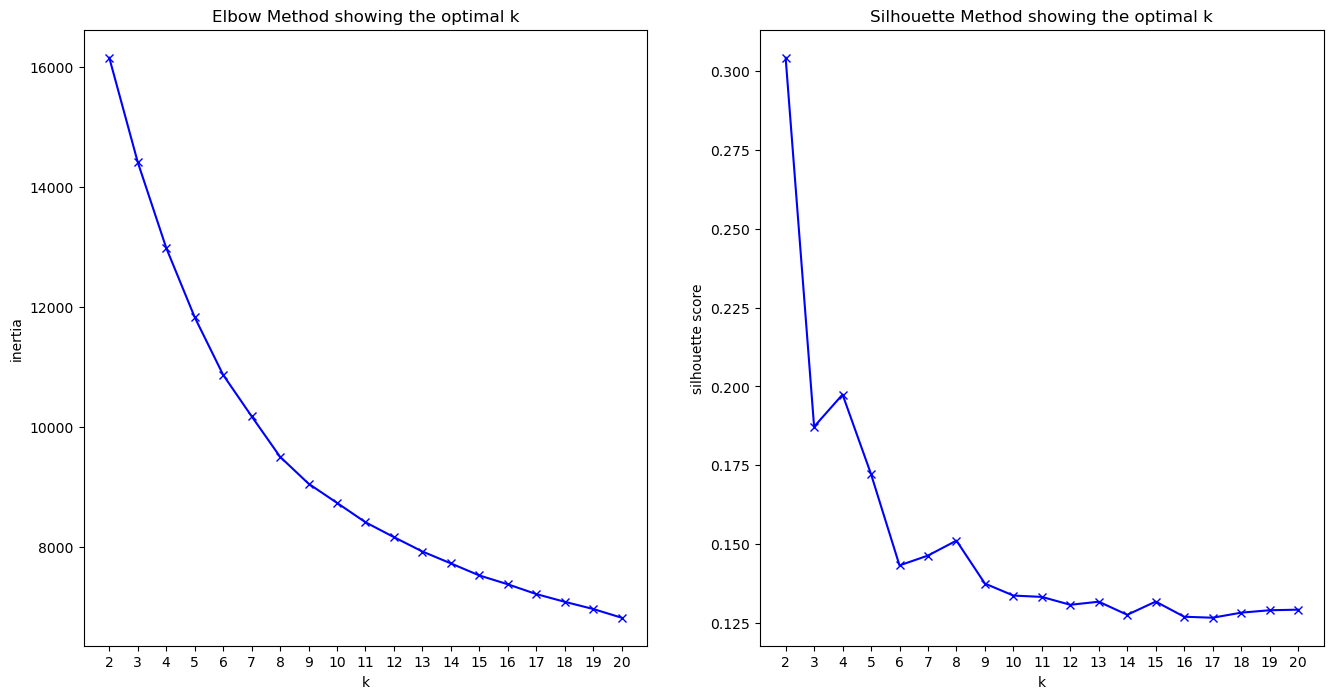

In [65]:
#4 use a clustering method: KMEANS
#choosing the k; both methods suggest to use k = 3
K = range(2, 21)

inertia = []
silhouette = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234,
                    verbose=1)
    kmeans.fit(X_scaled_df)

    filename = "kmeans_" + str(k) + "KMeans.pickle" # Path with filename # kmeans_n.pickle
    with open(filename, "wb") as file:
       pickle.dump(kmeans,file)

    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X_scaled_df, kmeans.predict(X_scaled_df)))


import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,2,figsize=(16,8))
ax[0].plot(K, inertia, 'bx-')
ax[0].set_xlabel('k')
ax[0].set_ylabel('inertia')
ax[0].set_xticks(np.arange(min(K), max(K)+1, 1.0))
ax[0].set_title('Elbow Method showing the optimal k')
ax[1].plot(K, silhouette, 'bx-')
ax[1].set_xlabel('k')
ax[1].set_ylabel('silhouette score')
ax[1].set_xticks(np.arange(min(K), max(K)+1, 1.0))
ax[1].set_title('Silhouette Method showing the optimal k')

In [66]:
#set the n_clusters with the k computed = 3
kmeans = KMeans(n_clusters=3 , random_state=10) 
kmeans.fit(X_scaled_df)

C:\Users\priya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\priya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


KMeans(n_clusters=3, random_state=10)

In [67]:
clusters = kmeans.predict(X_scaled_df)
#clusters and how many observations has each cluster
pd.Series(clusters).value_counts().sort_index() # Number of songs in each cluster

0     662
1      58
2    1380
Name: count, dtype: int64

In [68]:
X_features["cluster"] = clusters
X_features.head()

C:\Users\priya\AppData\Local\Temp\ipykernel_25876\3177692148.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_features["cluster"] = clusters


,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,tempo,cluster
0,0.943,0.558,2,-4.911,0.0568,0.0026,0.000002,0.0937,104.983,0
1,0.552,0.702,9,-5.707,0.1570,0.1170,0.000021,0.1050,169.994,2
2,0.750,0.733,6,-3.180,0.0319,0.2560,0.000000,0.1140,111.018,2
3,0.868,0.538,5,-8.603,0.1740,0.2690,0.000003,0.0901,99.968,0
4,0.429,0.453,0,-7.746,0.0459,0.5540,0.000002,0.1020,77.639,0


In [69]:
#set the n_clusters with the k computed = 5
kmeans = KMeans(n_clusters=5 , random_state=10) 
kmeans.fit(X_scaled_df)

clusters = kmeans.predict(X_scaled_df)
#clusters and how many observations has each cluster
pd.Series(clusters).value_counts().sort_index() # Number of songs in each cluster

C:\Users\priya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\priya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


0     283
1     356
2      58
3    1085
4     318
Name: count, dtype: int64

In [70]:
X_features["cluster"] = clusters
X_features.head()

C:\Users\priya\AppData\Local\Temp\ipykernel_25876\3177692148.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_features["cluster"] = clusters


,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,tempo,cluster
0,0.943,0.558,2,-4.911,0.0568,0.0026,0.000002,0.0937,104.983,3
1,0.552,0.702,9,-5.707,0.1570,0.1170,0.000021,0.1050,169.994,3
2,0.750,0.733,6,-3.180,0.0319,0.2560,0.000000,0.1140,111.018,3
3,0.868,0.538,5,-8.603,0.1740,0.2690,0.000003,0.0901,99.968,4
4,0.429,0.453,0,-7.746,0.0459,0.5540,0.000002,0.1020,77.639,0


In [71]:
#set the n_clusters with the k computed = 6
kmeans = KMeans(n_clusters=6 , random_state=10) 
kmeans.fit(X_scaled_df)

clusters = kmeans.predict(X_scaled_df)
#clusters and how many observations has each cluster
pd.Series(clusters).value_counts().sort_index() # Number of songs in each cluster

C:\Users\priya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\priya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


0    270
1    289
2    689
3     55
4    586
5    211
Name: count, dtype: int64

In [72]:
X_features["cluster"] = clusters
X_features.head()

C:\Users\priya\AppData\Local\Temp\ipykernel_25876\3177692148.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_features["cluster"] = clusters


,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,tempo,cluster
0,0.943,0.558,2,-4.911,0.0568,0.0026,0.000002,0.0937,104.983,4
1,0.552,0.702,9,-5.707,0.1570,0.1170,0.000021,0.1050,169.994,2
2,0.750,0.733,6,-3.180,0.0319,0.2560,0.000000,0.1140,111.018,2
3,0.868,0.538,5,-8.603,0.1740,0.2690,0.000003,0.0901,99.968,1
4,0.429,0.453,0,-7.746,0.0459,0.5540,0.000002,0.1020,77.639,5


In [73]:
#set the n_clusters with the k computed = 4
kmeans = KMeans(n_clusters=4 , random_state=10) 
kmeans.fit(X_scaled_df)

clusters = kmeans.predict(X_scaled_df)
#clusters and how many observations has each cluster
pd.Series(clusters).value_counts().sort_index() # Number of songs in each cluster

C:\Users\priya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\priya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


0    178
1    964
2    322
3    636
Name: count, dtype: int64

In [74]:
X_features["cluster"] = clusters
X_features.head()

C:\Users\priya\AppData\Local\Temp\ipykernel_25876\3177692148.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_features["cluster"] = clusters


,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,tempo,cluster
0,0.943,0.558,2,-4.911,0.0568,0.0026,0.000002,0.0937,104.983,1
1,0.552,0.702,9,-5.707,0.1570,0.1170,0.000021,0.1050,169.994,3
2,0.750,0.733,6,-3.180,0.0319,0.2560,0.000000,0.1140,111.018,1
3,0.868,0.538,5,-8.603,0.1740,0.2690,0.000003,0.0901,99.968,1
4,0.429,0.453,0,-7.746,0.0459,0.5540,0.000002,0.1020,77.639,0


In [76]:
merged_df1

,artist,song,id,danceability,energy,key,loudness,mode,speechiness,acousticness,...,valence,tempo,type,id.1,uri,track_href,analysis_url,duration_ms,time_signature,H_or_N
0,Jack Harlow,Lovin On Me,spotify:track:4xhsWYTOGcal8zt0J161CU,0.943,0.558,2,-4.911,1,0.0568,0.00260,...,0.606,104.983,audio_features,4xhsWYTOGcal8zt0J161CU,spotify:track:4xhsWYTOGcal8zt0J161CU,https://api.spotify.com/v1/tracks/4xhsWYTOGcal...,https://api.spotify.com/v1/audio-analysis/4xhs...,138411,4,H
1,Taylor Swift,Cruel Summer,spotify:track:1BxfuPKGuaTgP7aM0Bbdwr,0.552,0.702,9,-5.707,1,0.1570,0.11700,...,0.564,169.994,audio_features,1BxfuPKGuaTgP7aM0Bbdwr,spotify:track:1BxfuPKGuaTgP7aM0Bbdwr,https://api.spotify.com/v1/tracks/1BxfuPKGuaTg...,https://api.spotify.com/v1/audio-analysis/1Bxf...,178427,4,H
2,Tate McRae,Greedy,spotify:track:3rUGC1vUpkDG9CZFHMur1t,0.750,0.733,6,-3.180,0,0.0319,0.25600,...,0.844,111.018,audio_features,3rUGC1vUpkDG9CZFHMur1t,spotify:track:3rUGC1vUpkDG9CZFHMur1t,https://api.spotify.com/v1/tracks/3rUGC1vUpkDG...,https://api.spotify.com/v1/audio-analysis/3rUG...,131872,1,H
3,Doja Cat,Paint The Town Red,spotify:track:2IGMVunIBsBLtEQyoI1Mu7,0.868,0.538,5,-8.603,1,0.1740,0.26900,...,0.732,99.968,audio_features,2IGMVunIBsBLtEQyoI1Mu7,spotify:track:2IGMVunIBsBLtEQyoI1Mu7,https://api.spotify.com/v1/tracks/2IGMVunIBsBL...,https://api.spotify.com/v1/audio-analysis/2IGM...,231750,4,H
4,Zach Bryan Featuring Kacey Musgraves,I Remember Everything,spotify:track:4KULAymBBJcPRpk1yO4dOG,0.429,0.453,0,-7.746,1,0.0459,0.55400,...,0.155,77.639,audio_features,4KULAymBBJcPRpk1yO4dOG,spotify:track:4KULAymBBJcPRpk1yO4dOG,https://api.spotify.com/v1/tracks/4KULAymBBJcP...,https://api.spotify.com/v1/audio-analysis/4KUL...,227196,4,H
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,Jonas Brothers,Sucker,spotify:track:22vgEDb5hykfaTwLuskFGD,0.775,0.598,2,-7.274,1,0.0535,0.00175,...,0.356,129.988,audio_features,0lnIJmgcUpEpe4AZACjayW,spotify:track:0lnIJmgcUpEpe4AZACjayW,https://api.spotify.com/v1/tracks/0lnIJmgcUpEp...,https://api.spotify.com/v1/audio-analysis/0lnI...,232560,4,N
2096,Taylor Swift,Cruel Summer,spotify:track:1BxfuPKGuaTgP7aM0Bbdwr,0.773,0.747,5,-4.061,1,0.0885,0.02420,...,0.801,126.014,audio_features,0ErK6K0kYr0Ow2RkPMhmMs,spotify:track:0ErK6K0kYr0Ow2RkPMhmMs,https://api.spotify.com/v1/tracks/0ErK6K0kYr0O...,https://api.spotify.com/v1/audio-analysis/0ErK...,246240,4,N
2097,Blanco Brown,The Git Up,spotify:track:01tA4XmJ4fGQNwti6b2hPm,0.664,0.573,5,-6.519,1,0.0277,0.61300,...,0.566,76.023,audio_features,3d8y0t70g7hw2FOWl9Z4Fm,spotify:track:3d8y0t70g7hw2FOWl9Z4Fm,https://api.spotify.com/v1/tracks/3d8y0t70g7hw...,https://api.spotify.com/v1/audio-analysis/3d8y...,160097,4,N
2098,Sam Smith,Dancing With A Stranger (with Normani),spotify:track:3xgT3xIlFGqZjYW9QlhJWp,0.275,0.238,9,-13.119,1,0.0389,0.97700,...,0.257,88.980,audio_features,0fF9YHMCuv1mAQv4z5SU7L,spotify:track:0fF9YHMCuv1mAQv4z5SU7L,https://api.spotify.com/v1/tracks/0fF9YHMCuv1m...,https://api.spotify.com/v1/audio-analysis/0fF9...,155167,4,N


In [77]:
columns_to_drop = ['type', 'id.1', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature', 'mode',  'valence', 'danceability', 'energy', 'key', 'loudness',

       'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'tempo']

# Check if columns exist in the DataFrame

columns_to_drop_existing = list(set(columns_to_drop).intersection(merged_df.columns))


# Drop the existing columns

merged_df = merged_df.drop(columns=columns_to_drop_existing)

merged_df.columns

Index(['Unnamed: 0', 'rank', 'title', 'artist', 'id', 'label'], dtype='object')

In [78]:
merged_df1

,artist,song,id,danceability,energy,key,loudness,mode,speechiness,acousticness,...,valence,tempo,type,id.1,uri,track_href,analysis_url,duration_ms,time_signature,H_or_N
0,Jack Harlow,Lovin On Me,spotify:track:4xhsWYTOGcal8zt0J161CU,0.943,0.558,2,-4.911,1,0.0568,0.00260,...,0.606,104.983,audio_features,4xhsWYTOGcal8zt0J161CU,spotify:track:4xhsWYTOGcal8zt0J161CU,https://api.spotify.com/v1/tracks/4xhsWYTOGcal...,https://api.spotify.com/v1/audio-analysis/4xhs...,138411,4,H
1,Taylor Swift,Cruel Summer,spotify:track:1BxfuPKGuaTgP7aM0Bbdwr,0.552,0.702,9,-5.707,1,0.1570,0.11700,...,0.564,169.994,audio_features,1BxfuPKGuaTgP7aM0Bbdwr,spotify:track:1BxfuPKGuaTgP7aM0Bbdwr,https://api.spotify.com/v1/tracks/1BxfuPKGuaTg...,https://api.spotify.com/v1/audio-analysis/1Bxf...,178427,4,H
2,Tate McRae,Greedy,spotify:track:3rUGC1vUpkDG9CZFHMur1t,0.750,0.733,6,-3.180,0,0.0319,0.25600,...,0.844,111.018,audio_features,3rUGC1vUpkDG9CZFHMur1t,spotify:track:3rUGC1vUpkDG9CZFHMur1t,https://api.spotify.com/v1/tracks/3rUGC1vUpkDG...,https://api.spotify.com/v1/audio-analysis/3rUG...,131872,1,H
3,Doja Cat,Paint The Town Red,spotify:track:2IGMVunIBsBLtEQyoI1Mu7,0.868,0.538,5,-8.603,1,0.1740,0.26900,...,0.732,99.968,audio_features,2IGMVunIBsBLtEQyoI1Mu7,spotify:track:2IGMVunIBsBLtEQyoI1Mu7,https://api.spotify.com/v1/tracks/2IGMVunIBsBL...,https://api.spotify.com/v1/audio-analysis/2IGM...,231750,4,H
4,Zach Bryan Featuring Kacey Musgraves,I Remember Everything,spotify:track:4KULAymBBJcPRpk1yO4dOG,0.429,0.453,0,-7.746,1,0.0459,0.55400,...,0.155,77.639,audio_features,4KULAymBBJcPRpk1yO4dOG,spotify:track:4KULAymBBJcPRpk1yO4dOG,https://api.spotify.com/v1/tracks/4KULAymBBJcP...,https://api.spotify.com/v1/audio-analysis/4KUL...,227196,4,H
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,Jonas Brothers,Sucker,spotify:track:22vgEDb5hykfaTwLuskFGD,0.775,0.598,2,-7.274,1,0.0535,0.00175,...,0.356,129.988,audio_features,0lnIJmgcUpEpe4AZACjayW,spotify:track:0lnIJmgcUpEpe4AZACjayW,https://api.spotify.com/v1/tracks/0lnIJmgcUpEp...,https://api.spotify.com/v1/audio-analysis/0lnI...,232560,4,N
2096,Taylor Swift,Cruel Summer,spotify:track:1BxfuPKGuaTgP7aM0Bbdwr,0.773,0.747,5,-4.061,1,0.0885,0.02420,...,0.801,126.014,audio_features,0ErK6K0kYr0Ow2RkPMhmMs,spotify:track:0ErK6K0kYr0Ow2RkPMhmMs,https://api.spotify.com/v1/tracks/0ErK6K0kYr0O...,https://api.spotify.com/v1/audio-analysis/0ErK...,246240,4,N
2097,Blanco Brown,The Git Up,spotify:track:01tA4XmJ4fGQNwti6b2hPm,0.664,0.573,5,-6.519,1,0.0277,0.61300,...,0.566,76.023,audio_features,3d8y0t70g7hw2FOWl9Z4Fm,spotify:track:3d8y0t70g7hw2FOWl9Z4Fm,https://api.spotify.com/v1/tracks/3d8y0t70g7hw...,https://api.spotify.com/v1/audio-analysis/3d8y...,160097,4,N
2098,Sam Smith,Dancing With A Stranger (with Normani),spotify:track:3xgT3xIlFGqZjYW9QlhJWp,0.275,0.238,9,-13.119,1,0.0389,0.97700,...,0.257,88.980,audio_features,0fF9YHMCuv1mAQv4z5SU7L,spotify:track:0fF9YHMCuv1mAQv4z5SU7L,https://api.spotify.com/v1/tracks/0fF9YHMCuv1m...,https://api.spotify.com/v1/audio-analysis/0fF9...,155167,4,N


In [80]:
merged_df1.head(200)

,artist,song,id,danceability,energy,key,loudness,mode,speechiness,acousticness,...,valence,tempo,type,id.1,uri,track_href,analysis_url,duration_ms,time_signature,H_or_N
0,Jack Harlow,Lovin On Me,spotify:track:4xhsWYTOGcal8zt0J161CU,0.943,0.558,2,-4.911,1,0.0568,0.002600,...,0.606,104.983,audio_features,4xhsWYTOGcal8zt0J161CU,spotify:track:4xhsWYTOGcal8zt0J161CU,https://api.spotify.com/v1/tracks/4xhsWYTOGcal...,https://api.spotify.com/v1/audio-analysis/4xhs...,138411,4,H
1,Taylor Swift,Cruel Summer,spotify:track:1BxfuPKGuaTgP7aM0Bbdwr,0.552,0.702,9,-5.707,1,0.1570,0.117000,...,0.564,169.994,audio_features,1BxfuPKGuaTgP7aM0Bbdwr,spotify:track:1BxfuPKGuaTgP7aM0Bbdwr,https://api.spotify.com/v1/tracks/1BxfuPKGuaTg...,https://api.spotify.com/v1/audio-analysis/1Bxf...,178427,4,H
2,Tate McRae,Greedy,spotify:track:3rUGC1vUpkDG9CZFHMur1t,0.750,0.733,6,-3.180,0,0.0319,0.256000,...,0.844,111.018,audio_features,3rUGC1vUpkDG9CZFHMur1t,spotify:track:3rUGC1vUpkDG9CZFHMur1t,https://api.spotify.com/v1/tracks/3rUGC1vUpkDG...,https://api.spotify.com/v1/audio-analysis/3rUG...,131872,1,H
3,Doja Cat,Paint The Town Red,spotify:track:2IGMVunIBsBLtEQyoI1Mu7,0.868,0.538,5,-8.603,1,0.1740,0.269000,...,0.732,99.968,audio_features,2IGMVunIBsBLtEQyoI1Mu7,spotify:track:2IGMVunIBsBLtEQyoI1Mu7,https://api.spotify.com/v1/tracks/2IGMVunIBsBL...,https://api.spotify.com/v1/audio-analysis/2IGM...,231750,4,H
4,Zach Bryan Featuring Kacey Musgraves,I Remember Everything,spotify:track:4KULAymBBJcPRpk1yO4dOG,0.429,0.453,0,-7.746,1,0.0459,0.554000,...,0.155,77.639,audio_features,4KULAymBBJcPRpk1yO4dOG,spotify:track:4KULAymBBJcPRpk1yO4dOG,https://api.spotify.com/v1/tracks/4KULAymBBJcP...,https://api.spotify.com/v1/audio-analysis/4KUL...,227196,4,H
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Wheatus,Teenage Dirtbag,spotify:track:3LI4MmibTkXH5cGpCGZgyw,0.617,0.840,4,-4.063,1,0.0512,0.360000,...,0.570,94.676,audio_features,3LI4MmibTkXH5cGpCGZgyw,spotify:track:3LI4MmibTkXH5cGpCGZgyw,https://api.spotify.com/v1/tracks/3LI4MmibTkXH...,https://api.spotify.com/v1/audio-analysis/3LI4...,241840,4,N
196,Christina Aguilera,Come on over Baby (All I Want Is You) - Radio ...,spotify:track:7A0apkTSTvMbSI7yplcmlh,0.829,0.915,8,-3.205,1,0.1060,0.226000,...,0.779,118.903,audio_features,7A0apkTSTvMbSI7yplcmlh,spotify:track:7A0apkTSTvMbSI7yplcmlh,https://api.spotify.com/v1/tracks/7A0apkTSTvMb...,https://api.spotify.com/v1/audio-analysis/7A0a...,203333,4,N
197,Creed,Higher,spotify:track:1ZozJfi8u9cO2Ob8KwiwNT,0.459,0.830,2,-6.254,1,0.0364,0.000051,...,0.431,155.827,audio_features,1ZozJfi8u9cO2Ob8KwiwNT,spotify:track:1ZozJfi8u9cO2Ob8KwiwNT,https://api.spotify.com/v1/tracks/1ZozJfi8u9cO...,https://api.spotify.com/v1/audio-analysis/1Zoz...,316733,4,N
198,Britney Spears,Lucky,spotify:track:4cHUfCT3yetKajxWKLhDlT,0.763,0.834,1,-5.237,1,0.0329,0.271000,...,0.965,95.017,audio_features,4cHUfCT3yetKajxWKLhDlT,spotify:track:4cHUfCT3yetKajxWKLhDlT,https://api.spotify.com/v1/tracks/4cHUfCT3yetK...,https://api.spotify.com/v1/audio-analysis/4cHU...,207267,4,N


In [81]:
merged_df1.to_csv('merged_df2.csv', index=False)

In [83]:
merged_df3 = pd.concat([merged_df1, X_features["cluster"]], axis=1)
merged_df3

,artist,song,id,danceability,energy,key,loudness,mode,speechiness,acousticness,...,tempo,type,id.1,uri,track_href,analysis_url,duration_ms,time_signature,H_or_N,cluster
0,Jack Harlow,Lovin On Me,spotify:track:4xhsWYTOGcal8zt0J161CU,0.943,0.558,2,-4.911,1,0.0568,0.00260,...,104.983,audio_features,4xhsWYTOGcal8zt0J161CU,spotify:track:4xhsWYTOGcal8zt0J161CU,https://api.spotify.com/v1/tracks/4xhsWYTOGcal...,https://api.spotify.com/v1/audio-analysis/4xhs...,138411,4,H,1
1,Taylor Swift,Cruel Summer,spotify:track:1BxfuPKGuaTgP7aM0Bbdwr,0.552,0.702,9,-5.707,1,0.1570,0.11700,...,169.994,audio_features,1BxfuPKGuaTgP7aM0Bbdwr,spotify:track:1BxfuPKGuaTgP7aM0Bbdwr,https://api.spotify.com/v1/tracks/1BxfuPKGuaTg...,https://api.spotify.com/v1/audio-analysis/1Bxf...,178427,4,H,3
2,Tate McRae,Greedy,spotify:track:3rUGC1vUpkDG9CZFHMur1t,0.750,0.733,6,-3.180,0,0.0319,0.25600,...,111.018,audio_features,3rUGC1vUpkDG9CZFHMur1t,spotify:track:3rUGC1vUpkDG9CZFHMur1t,https://api.spotify.com/v1/tracks/3rUGC1vUpkDG...,https://api.spotify.com/v1/audio-analysis/3rUG...,131872,1,H,1
3,Doja Cat,Paint The Town Red,spotify:track:2IGMVunIBsBLtEQyoI1Mu7,0.868,0.538,5,-8.603,1,0.1740,0.26900,...,99.968,audio_features,2IGMVunIBsBLtEQyoI1Mu7,spotify:track:2IGMVunIBsBLtEQyoI1Mu7,https://api.spotify.com/v1/tracks/2IGMVunIBsBL...,https://api.spotify.com/v1/audio-analysis/2IGM...,231750,4,H,1
4,Zach Bryan Featuring Kacey Musgraves,I Remember Everything,spotify:track:4KULAymBBJcPRpk1yO4dOG,0.429,0.453,0,-7.746,1,0.0459,0.55400,...,77.639,audio_features,4KULAymBBJcPRpk1yO4dOG,spotify:track:4KULAymBBJcPRpk1yO4dOG,https://api.spotify.com/v1/tracks/4KULAymBBJcP...,https://api.spotify.com/v1/audio-analysis/4KUL...,227196,4,H,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,Jonas Brothers,Sucker,spotify:track:22vgEDb5hykfaTwLuskFGD,0.775,0.598,2,-7.274,1,0.0535,0.00175,...,129.988,audio_features,0lnIJmgcUpEpe4AZACjayW,spotify:track:0lnIJmgcUpEpe4AZACjayW,https://api.spotify.com/v1/tracks/0lnIJmgcUpEp...,https://api.spotify.com/v1/audio-analysis/0lnI...,232560,4,N,1
2096,Taylor Swift,Cruel Summer,spotify:track:1BxfuPKGuaTgP7aM0Bbdwr,0.773,0.747,5,-4.061,1,0.0885,0.02420,...,126.014,audio_features,0ErK6K0kYr0Ow2RkPMhmMs,spotify:track:0ErK6K0kYr0Ow2RkPMhmMs,https://api.spotify.com/v1/tracks/0ErK6K0kYr0O...,https://api.spotify.com/v1/audio-analysis/0ErK...,246240,4,N,1
2097,Blanco Brown,The Git Up,spotify:track:01tA4XmJ4fGQNwti6b2hPm,0.664,0.573,5,-6.519,1,0.0277,0.61300,...,76.023,audio_features,3d8y0t70g7hw2FOWl9Z4Fm,spotify:track:3d8y0t70g7hw2FOWl9Z4Fm,https://api.spotify.com/v1/tracks/3d8y0t70g7hw...,https://api.spotify.com/v1/audio-analysis/3d8y...,160097,4,N,0
2098,Sam Smith,Dancing With A Stranger (with Normani),spotify:track:3xgT3xIlFGqZjYW9QlhJWp,0.275,0.238,9,-13.119,1,0.0389,0.97700,...,88.980,audio_features,0fF9YHMCuv1mAQv4z5SU7L,spotify:track:0fF9YHMCuv1mAQv4z5SU7L,https://api.spotify.com/v1/tracks/0fF9YHMCuv1m...,https://api.spotify.com/v1/audio-analysis/0fF9...,155167,4,N,0
